<a href="https://colab.research.google.com/github/shreekanthsenthil/plant-seedling-detection/blob/main/Plant_Seedling_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm, colors
import random
import cv2

from math import sqrt, floor

import tensorflow as tf

# **ANALYSIS**

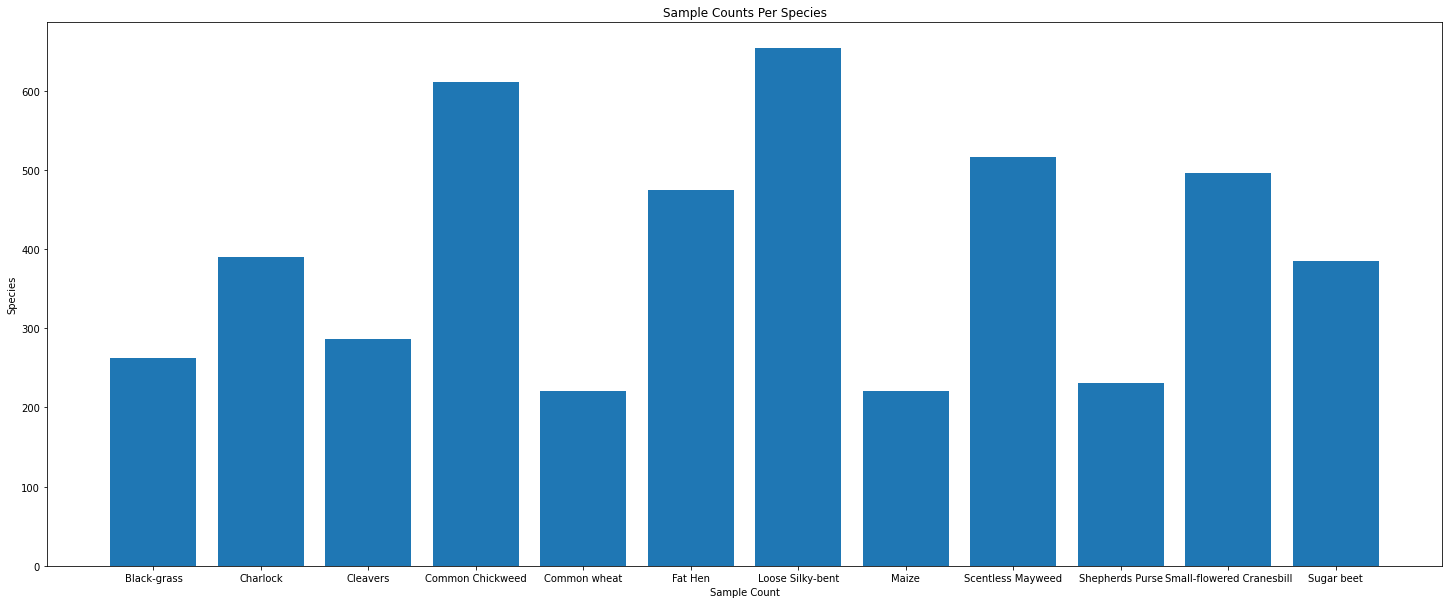

Black-grass :  263
Charlock :  390
Cleavers :  287
Common Chickweed :  611
Common wheat :  221
Fat Hen :  475
Loose Silky-bent :  654
Maize :  221
Scentless Mayweed :  516
Shepherds Purse :  231
Small-flowered Cranesbill :  496
Sugar beet :  385


In [ ]:
classes = [
           'Black-grass',
           'Charlock',
           'Cleavers',
           'Common Chickweed',
           'Common wheat',
           'Fat Hen',
           'Loose Silky-bent',
           'Maize',
           'Scentless Mayweed',
           'Shepherds Purse',
           'Small-flowered Cranesbill',
           'Sugar beet'
           ]

sample_counts = []

for className in classes:
  if os.path.isdir(os.path.join('/content/drive/MyDrive/SE Project/Dataset/train', className)):
    sample_counts.append(len(os.listdir(os.path.join('/content/drive/MyDrive/SE Project/Dataset/train', className))))
  else:
    print(className)

plt.figure(figsize=(25,10))
plt.bar(classes, sample_counts)
plt.title('Sample Counts Per Species')
plt.ylabel('Species')
plt.xlabel('Sample Count')
plt.show()

for i in range(len(classes)):
  print(classes[i] + " : " , sample_counts[i])


 Black-grass


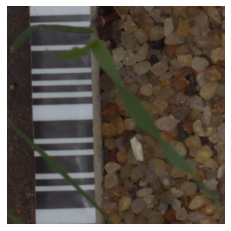


 Charlock


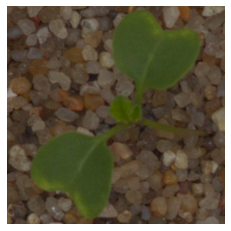


 Cleavers


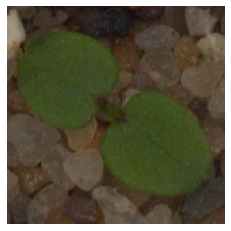


 Common Chickweed


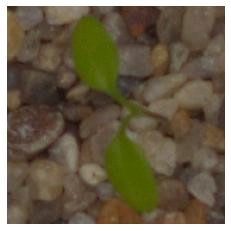


 Common wheat


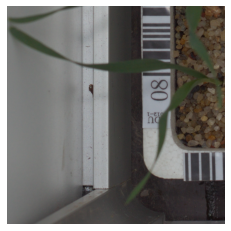


 Fat Hen


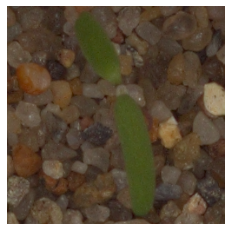


 Loose Silky-bent


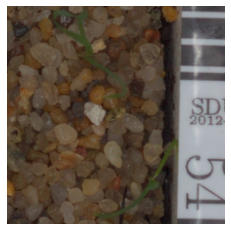


 Maize


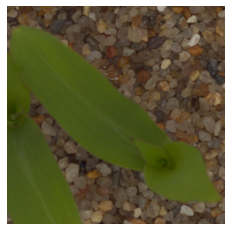


 Scentless Mayweed


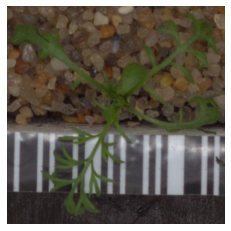


 Shepherds Purse


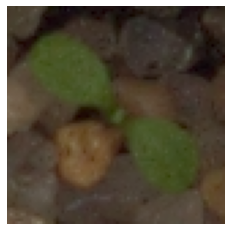


 Small-flowered Cranesbill


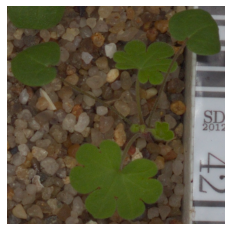


 Sugar beet


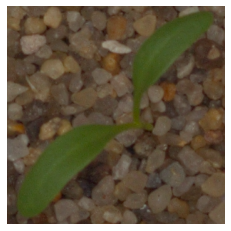

In [ ]:
for i in range(12):
  sample_path = os.path.join('/content/drive/MyDrive/SE Project/Dataset/train', classes[i])
  random_image_path = os.path.join(sample_path, random.choice(os.listdir(sample_path)))
  print("\n", classes[i])
  random_image = cv2.imread(random_image_path)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(random_image, cv2.COLOR_BGR2RGB))
  plt.show()


# **PRE-PROCESSING**

In [ ]:
for i in range(12):
  sample_path = os.path.join('/content/drive/MyDrive/SE Project/Dataset/train', classes[i])
  random_image_path = os.path.join(sample_path, random.choice(os.listdir(sample_path)))
  print("\n", classes[i])
  random_image = cv2.imread(random_image_path)
  print(random_image.shape)


 Black-grass
(614, 615, 3)

 Charlock
(311, 311, 3)

 Cleavers
(540, 540, 3)

 Common Chickweed
(106, 106, 3)

 Common wheat
(745, 745, 3)

 Fat Hen
(336, 336, 3)

 Loose Silky-bent
(211, 211, 3)

 Maize
(866, 866, 3)

 Scentless Mayweed
(126, 126, 3)

 Shepherds Purse
(119, 119, 3)

 Small-flowered Cranesbill
(748, 748, 3)

 Sugar beet
(1036, 1036, 3)


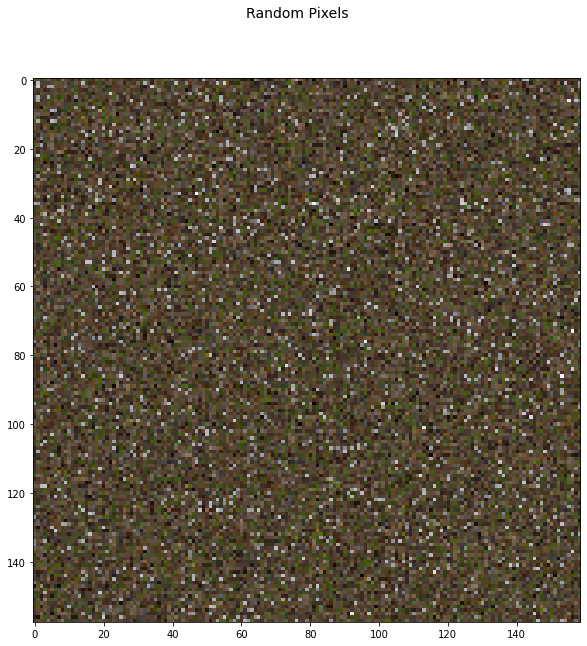

In [ ]:
def generate_random_pixel_image(samples_per_class, pixels_per_image):
  total_pixels = 12*samples_per_class * pixels_per_image
  random_pixels = np.zeros((total_pixels, 3), dtype=np.uint8)
  for i in range(12):
    sample_class = os.path.join('/content/drive/MyDrive/SE Project/Dataset/train', classes[i])
    for j in range(samples_per_class):
      random_image = os.path.join(sample_class, random.choice(os.listdir(sample_class)))
      image = cv2.imread(random_image)
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
      image = np.reshape(image, (image.shape[0]*image.shape[1] , 3))
      new_pixels = image[np.random.randint(0, image.shape[0], pixels_per_image)]
      start_index = pixels_per_image * (i * samples_per_class + j)
      random_pixels[start_index: start_index+pixels_per_image, :] = new_pixels

  h = floor(sqrt(total_pixels))
  w = total_pixels//h

  random_pixels = random_pixels[np.random.choice(total_pixels, h*w, replace=False)]
  random_pixels = np.reshape(random_pixels, (h, w, 3))
  return random_pixels
      


random_pixels = generate_random_pixel_image(30,70)

plt.figure(figsize=(10,10))
plt.suptitle('Random Pixels', fontsize=14, horizontalalignment='center')
plt.imshow(random_pixels)
plt.show()

Plot Random Pixels in RGB Space

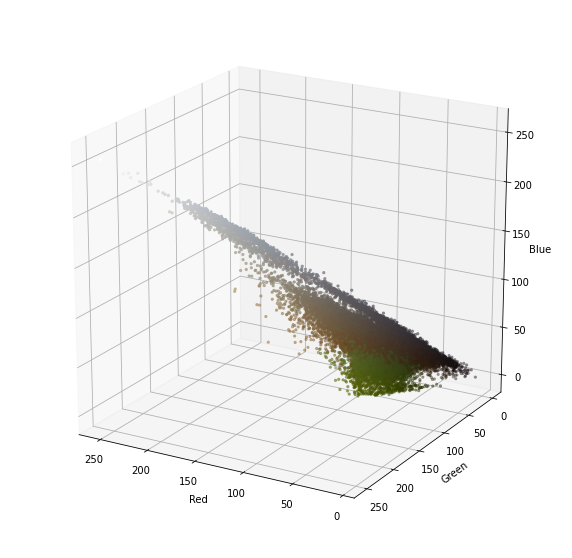

In [ ]:

r, g, b = cv2.split(random_pixels)
fig = plt.figure(figsize=(10, 10))
axis = fig.add_subplot(1, 1, 1, projection="3d")
axis.view_init(20, 120)

pixel_colors = random_pixels.reshape((np.shape(random_pixels)[0]*np.shape(random_pixels)[1], 3))
norm = colors.Normalize(vmin=-1.,vmax=1.)
norm.autoscale(pixel_colors)
pixel_colors = norm(pixel_colors).tolist()


axis.scatter(r.flatten(), g.flatten(), b.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Red")
axis.set_ylabel("Green")
axis.set_zlabel("Blue")
plt.show()

Plot Random Pixels in HSV Space

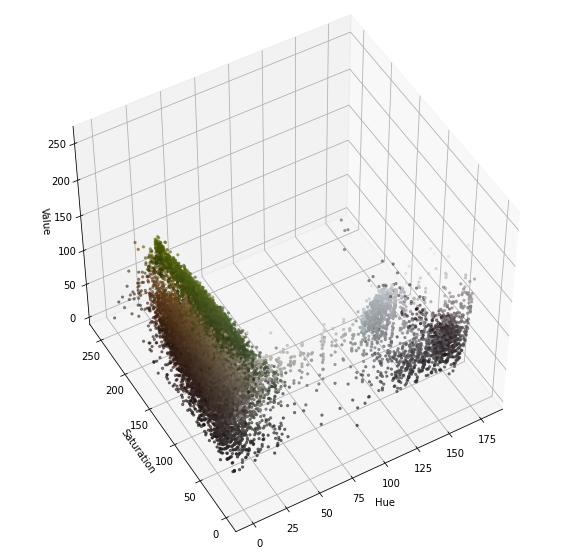

In [ ]:
hsv_image = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_image)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1,1,1, projection="3d")
axis.view_init(50,240)

axis.scatter(h.flatten(), s.flatten(), v.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
axis.set_zlabel("Value")
plt.show()

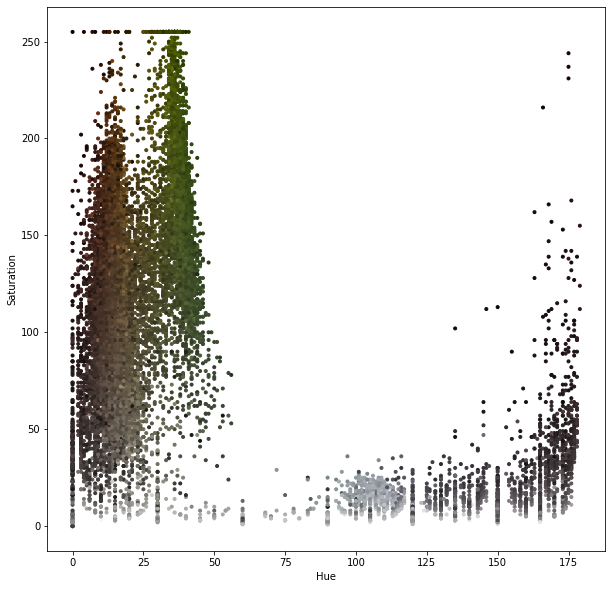

In [ ]:
hsv_img = cv2.cvtColor(np.uint8(random_pixels), cv2.COLOR_RGB2HSV)

h, s, v = cv2.split(hsv_img)
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(1, 1, 1)

axis.scatter(h.flatten(), s.flatten(), facecolors=pixel_colors, marker=".")
axis.set_xlabel("Hue")
axis.set_ylabel("Saturation")
plt.show()

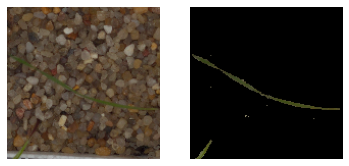

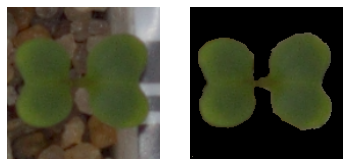

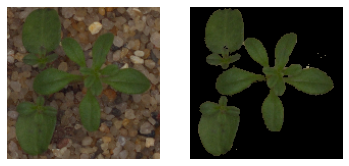

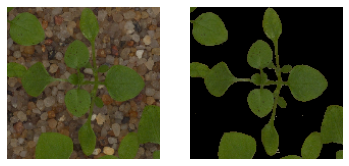

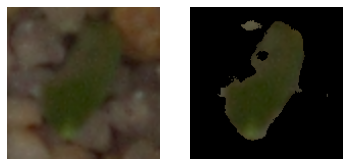

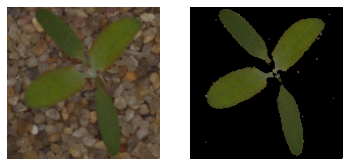

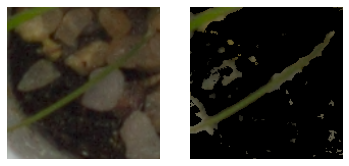

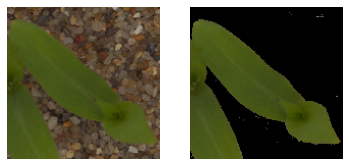

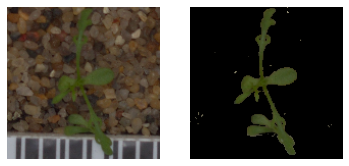

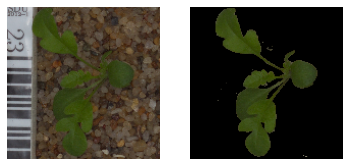

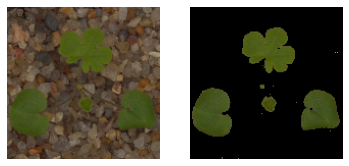

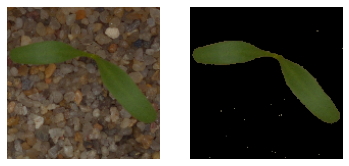

In [ ]:
lower_bound= (24, 50, 0)
upper_bound= (55, 255, 255)

for i in range(12):
    sample_class=os.path.join('/content/drive/MyDrive/SE Project/Dataset/train',classes[i])
    random_image= os.path.join(sample_class, random.choice(os.listdir(sample_class)))
    img= cv2.imread(random_image)
    img= cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img= cv2.resize(img, (150, 150))
    
    hsv_img= cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    mask = cv2.inRange(hsv_img, lower_bound, upper_bound)
    result = cv2.bitwise_and(img, img, mask=mask)

    plt.subplot(1,2,1)
    plt.imshow(img)
    plt.axis('off')
    # plt.show()

    plt.subplot(1,2,2)
    plt.imshow(result)
    plt.axis('off')
    plt.show()
    
# plt.show()